In [87]:
import json
import numpy as np

In [46]:
#convert json into csv


In [72]:
import pandas as pd
df = pd.read_csv('/content/sample_data/tweets.csv')
df.head(10)

,_key,tweet_author,tweet_text
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che..."
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...


Preprocessing step

In [73]:
!pip install tweet-preprocessor

In [74]:
import preprocessor as p
train_df = pd.read_csv('/content/sample_data/tweets.csv')


In [75]:
train_df.count()

_key            43347
tweet_author    43347
tweet_text      43347
dtype: int64

In [76]:
train_df = train_df.dropna()
train_df = train_df.drop_duplicates()

In [77]:
train_df.count()

_key            43347
tweet_author    43347
tweet_text      43347
dtype: int64

In [78]:
train_df.head()

,_key,tweet_author,tweet_text
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [82]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [83]:
from html.parser import HTMLParser
html_parser = HTMLParser()

In [84]:
train_df['clean_tweet'] = train_df['tweet_text'].apply(lambda x: html_parser.unescape(x))
train_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  """Entry point for launching an IPython kernel.


,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,NICE has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,NICE backs AstraZeneca’s Calquence for CLL htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,This is England for now - these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...","AstraZeneca’s Calquence (acalabrutinib), a che..."
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,Superstar @tobyeyre82 responding to the excell...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,CLL patients all know the drug Ibrutinib and y...


In [85]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [88]:
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['clean_tweet'], "@[\w]*")
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,NICE has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,NICE backs AstraZeneca’s Calquence for CLL htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,This is England for now - these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...","AstraZeneca’s Calquence (acalabrutinib), a che..."
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,Superstar responding to the excellent news of...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,CLL patients all know the drug Ibrutinib and y...


In [89]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: x.lower())
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,⚕️ scientists conducted a phase ii study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase 2 acalabrutinib-venetoclax (av) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,#nice backs #astrazenecas #calquence for #cll ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice backs astrazeneca’s calquence for cll htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,this is england for now - these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...","astrazeneca’s calquence (acalabrutinib), a che..."
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar responding to the excellent news of...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patients all know the drug ibrutinib and y...


In [91]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted a phase ii study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase 2 acalabrutinib venetoclax av tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice backs astrazeneca s calquence for cll htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,this is england for now these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...",astrazeneca s calquence acalabrutinib a che...
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar responding to the excellent news of...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patients all know the drug ibrutinib and y...


In [92]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted a phase ii study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase 2 acalabrutinib venetoclax av tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice backs astrazeneca s calquence for cll htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,this is england for now these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...",astrazeneca s calquence acalabrutinib a che...
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar responding to the excellent news of...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patients all know the drug ibrutinib and y...


In [93]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted a phase ii study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has recommended the use of acalabrutinib ...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice backs astrazeneca s calquence for cll htt...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,this is england for now these decisions usua...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...",astrazeneca s calquence acalabrutinib a che...
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar responding to the excellent news of...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patients all know the drug ibrutinib and y...


In [116]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
train_df['clean_tweet'][0:5]

0    scientists conducted phase ii study of acalabr...
1    this phase acalabrutinib venetoclax av trial t...
2    nice backs astrazenecas calquence for cll http...
3    acalabrutinib is valuable option in pts intole...
4    nice has recommended the use of acalabrutinib ...
Name: clean_tweet, dtype: object

In [117]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [118]:
train_df['tweet_token'] = train_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
train_df.head(10)

,_key,tweet_author,tweet_text,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...,scientists conducted phase ii study of acalabr...,"[scientists, conducted, phase, ii, study, of, ...","[scientists, conducted, phase, ii, study, acal...",scientist conduct phase ii studi acalabrutinib...,scientist conducted phase ii study acalabrutin...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...,this phase acalabrutinib venetoclax av trial t...,"[this, phase, acalabrutinib, venetoclax, av, t...","[phase, acalabrutinib, venetoclax, av, trial, ...",phase acalabrutinib venetoclax av trial still ...,phase acalabrutinib venetoclax av trial still ...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...,nice backs astrazenecas calquence for cll http...,"[nice, backs, astrazenecas, calquence, for, cl...","[nice, backs, astrazenecas, calquence, cll, ht...",nice back astrazeneca calquenc cll http co vb ...,nice back astrazenecas calquence cll http co v...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...,acalabrutinib is valuable option in pts intole...,"[acalabrutinib, is, valuable, option, in, pts,...","[acalabrutinib, valuable, option, pts, intoler...",acalabrutinib valuabl option pt intoler ibruti...,acalabrutinib valuable option pt intolerant ib...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...,nice has recommended the use of acalabrutinib ...,"[nice, has, recommended, the, use, of, acalabr...","[nice, recommended, use, acalabrutinib, patien...",nice recommend use acalabrutinib patient treat...,nice recommended use acalabrutinib patient tre...
5,1372927482278539265,David Ledger,NICE backs AstraZeneca’s Calquence for CLL htt...,nice backs astrazeneca calquence for cll https...,"[nice, backs, astrazeneca, calquence, for, cll...","[nice, backs, astrazeneca, calquence, cll, htt...",nice back astrazeneca calquenc cll http co jop...,nice back astrazeneca calquence cll http co jo...
6,1372911723305394179,N Wales Cancer Forum,This is England for now - these decisions usua...,this is england for now these decisions usuall...,"[this, is, england, for, now, these, decisions...","[england, decisions, usually, come, wales, inf...",england decis usual come wale info http co sr ...,england decision usually come wale info http c...
7,1372888121159868423,European Pharmaceutical Review,"AstraZeneca’s Calquence (acalabrutinib), a che...",astrazeneca calquence acalabrutinib chemothera...,"[astrazeneca, calquence, acalabrutinib, chemot...","[astrazeneca, calquence, acalabrutinib, chemot...",astrazeneca calquenc acalabrutinib chemotherap...,astrazeneca calquence acalabrutinib chemothera...
8,1372866915081797632,Graham Collins,Superstar @tobyeyre82 responding to the excell...,superstar responding to the excellent news of ...,"[superstar, responding, to, the, excellent, ne...","[superstar, responding, excellent, news, nice,...",superstar respond excel news nice approv acala...,superstar responding excellent news nice appro...
9,1372825553837944834,CLL Ireland,CLL patients all know the drug Ibrutinib and y...,cll patients all know the drug ibrutinib and y...,"[cll, patients, all, know, the, drug, ibrutini...","[cll, patients, know, drug, ibrutinib, yesterd...",cll patient know drug ibrutinib yesterday uk a...,cll patient know drug ibrutinib yesterday uk a...


In [119]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [120]:
train_df['tweet_token_filtered'] = train_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

In [121]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [122]:
train_df['tweet_stemmed'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_df['tweet_stemmed'].head(10)

0    scientist conduct phase ii studi acalabrutinib...
1    phase acalabrutinib venetoclax av trial still ...
2    nice back astrazeneca calquenc cll http co vb ...
3    acalabrutinib valuabl option pt intoler ibruti...
4    nice recommend use acalabrutinib patient treat...
5    nice back astrazeneca calquenc cll http co jop...
6    england decis usual come wale info http co sr ...
7    astrazeneca calquenc acalabrutinib chemotherap...
8    superstar respond excel news nice approv acala...
9    cll patient know drug ibrutinib yesterday uk a...
Name: tweet_stemmed, dtype: object

In [123]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [124]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
train_df['tweet_lemmatized'] = train_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_df['tweet_lemmatized'].head(10)

0    scientist conducted phase ii study acalabrutin...
1    phase acalabrutinib venetoclax av trial still ...
2    nice back astrazenecas calquence cll http co v...
3    acalabrutinib valuable option pt intolerant ib...
4    nice recommended use acalabrutinib patient tre...
5    nice back astrazeneca calquence cll http co jo...
6    england decision usually come wale info http c...
7    astrazeneca calquence acalabrutinib chemothera...
8    superstar responding excellent news nice appro...
9    cll patient know drug ibrutinib yesterday uk a...
Name: tweet_lemmatized, dtype: object

In [127]:
words_in_tweet = [tweet.lower().split() for tweet in train_df['tweet_lemmatized']]

In [128]:
import itertools
import collections
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(50)

[('co', 50116),
 ('http', 49953),
 ('cll', 29386),
 ('leukemia', 20308),
 ('lymphocytic', 17475),
 ('chronic', 17194),
 ('patient', 9856),
 ('treatment', 6295),
 ('new', 5663),
 ('cancer', 4563),
 ('cell', 4476),
 ('lymphoma', 4357),
 ('leusm', 4208),
 ('ibrutinib', 4144),
 ('acalabrutinib', 3798),
 ('dr', 2847),
 ('calquence', 2829),
 ('therapy', 2826),
 ('trial', 2758),
 ('venetoclax', 2673),
 ('ash', 2637),
 ('study', 2477),
 ('relapsed', 2458),
 ('drug', 2308),
 ('hematology', 2245),
 ('fda', 1871),
 ('clinical', 1780),
 ('article', 1659),
 ('phase', 1658),
 ('via', 1609),
 ('refractory', 1597),
 ('data', 1559),
 ('covid', 1481),
 ('lymsm', 1455),
 ('expert', 1335),
 ('research', 1325),
 ('risk', 1311),
 ('astrazeneca', 1301),
 ('inhibitor', 1299),
 ('rituximab', 1256),
 ('video', 1228),
 ('leukaemia', 1223),
 ('learn', 1221),
 ('combination', 1212),
 ('adult', 1152),
 ('cllsm', 1136),
 ('blood', 1135),
 ('result', 1126),
 ('btk', 1109),
 ('high', 1084)]

In [129]:
words_in_tweeter = [tweet.lower().split() for tweet in train_df['tweet_stemmed']]

In [130]:
import itertools
import collections
all_words_no_urls = list(itertools.chain(*words_in_tweeter))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(50)

[('co', 50117),
 ('http', 49953),
 ('cll', 29389),
 ('leukemia', 20308),
 ('lymphocyt', 18062),
 ('chronic', 17196),
 ('patient', 9881),
 ('treatment', 6295),
 ('new', 5663),
 ('cancer', 4565),
 ('cell', 4476),
 ('lymphoma', 4357),
 ('leusm', 4208),
 ('ibrutinib', 4144),
 ('acalabrutinib', 3802),
 ('dr', 2985),
 ('therapi', 2845),
 ('calquenc', 2829),
 ('trial', 2759),
 ('venetoclax', 2673),
 ('ash', 2637),
 ('relaps', 2631),
 ('studi', 2568),
 ('hematolog', 2471),
 ('drug', 2308),
 ('approv', 2200),
 ('clinic', 1913),
 ('fda', 1871),
 ('treat', 1827),
 ('articl', 1659),
 ('phase', 1658),
 ('via', 1609),
 ('research', 1608),
 ('refractori', 1599),
 ('data', 1559),
 ('combin', 1501),
 ('discuss', 1490),
 ('covid', 1481),
 ('lymsm', 1455),
 ('learn', 1394),
 ('expert', 1336),
 ('astrazeneca', 1312),
 ('risk', 1312),
 ('inhibitor', 1299),
 ('use', 1288),
 ('rituximab', 1256),
 ('target', 1230),
 ('video', 1229),
 ('leukaemia', 1223),
 ('show', 1165)]

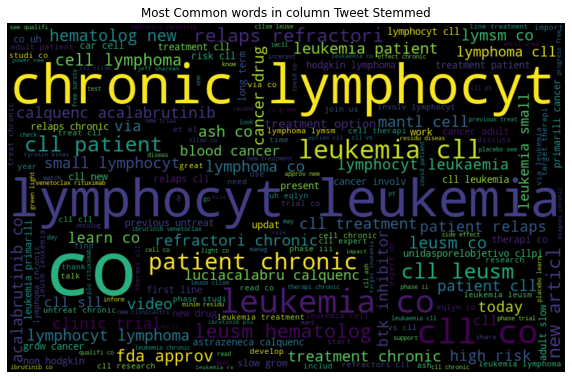

In [131]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in train_df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

In [140]:
tweet_counter = pd.DataFrame(counts_no_urls.most_common(25),
                             columns=['words', 'count'])
tweet_counter.head()

,words,count
0,co,50117
1,http,49953
2,cll,29389
3,leukemia,20308
4,lymphocyt,18062


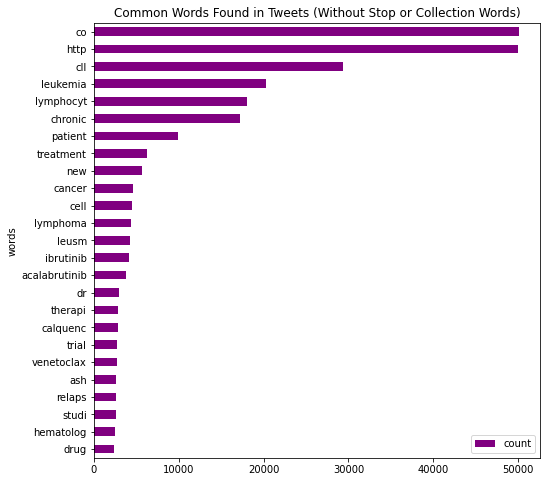

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
tweet_counter.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [142]:
from textblob import TextBlob

In [151]:
i=0
for tweet in train_df['tweet_lemmatized']:
  analysis = TextBlob((tweet))
        # set sentiment
  i=i+1
  if analysis.sentiment.polarity > 0:
    print("Author"+str(i),'positive')
  elif analysis.sentiment.polarity == 0:
    print("Author"+str(i),'positive', '    ','negative')
  else:
    print("Author"+str(i),'negative')  


Streaming output truncated to the last 5000 lines.
Author38348 positive
Author38349 positive      negative
Author38350 positive      negative
Author38351 positive      negative
Author38352 positive      negative
Author38353 positive      negative
Author38354 positive      negative
Author38355 positive      negative
Author38356 positive      negative
Author38357 positive
Author38358 positive      negative
Author38359 positive      negative
Author38360 negative
Author38361 negative
Author38362 positive      negative
Author38363 positive
Author38364 positive      negative
Author38365 positive      negative
Author38366 negative
Author38367 positive      negative
Author38368 positive      negative
Author38369 positive      negative
Author38370 positive      negative
Author38371 positive      negative
Author38372 positive
Author38373 positive      negative
Author38374 positive      negative
Author38375 positive      negative
Author38376 positive      negative
Author38377 positive
Author38378